In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import sys 
import math

In [2]:
data = np.loadtxt('/home/echeveste/mis_trabajos/correlation_f/data/data.dat')[:,:2]
rand = np.loadtxt('/home/echeveste/mis_trabajos/correlation_f/data/rand0.dat')[:,:2]

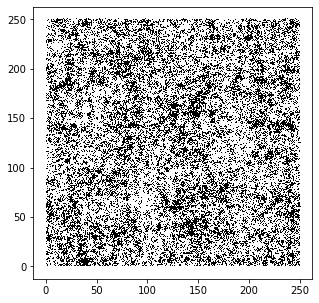

In [19]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[:,0],data[:,1],'k,')

In [20]:
tam = 20
x = [i for i in range(math.floor(np.min(data[:,0])),math.ceil(np.max(data[:,0]))+tam,tam)]
y = [i for i in range(math.floor(np.min(data[:,1])),math.ceil(np.max(data[:,1]))+tam,tam)]

In [21]:
x_ = math.ceil((math.ceil(np.max(data[:,0])) - math.floor(np.min(data[:,0])))/tam)
y_ = math.ceil((math.ceil(np.max(data[:,1])) - math.floor(np.min(data[:,1])))/tam)

In [22]:
mallas = []
for i in range(len(x)-1):
    for j in range(len(y)-1):
        mallas.append(data[(data[:,0]>x[i])&(data[:,0]<x[i+1])&(data[:,1]>y[j])&(data[:,1]<y[j+1])])

In [23]:
puntom = []
pm = tam/2
for i in range(int(np.sqrt(len(mallas)))):
    for j in range(int(np.sqrt(len(mallas)))):
        puntom.append([(tam/2)+i*tam,(tam/2)+j*tam])
puntom = np.array(puntom)

(-10.0, 260.0)

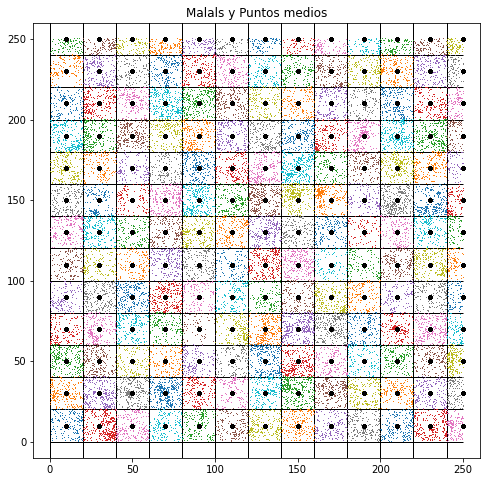

In [24]:
fig = plt.figure(figsize=(8,8))
plt.title('Malals y Puntos medios')
for i in range(len(mallas)):
    plt.plot(mallas[i][:,0],mallas[i][:,1],',')
    plt.plot(puntom[:,0],puntom[:,1],'k.')
    if i <= 250/tam:
        plt.axvline(i*tam,ymin=0, ymax = 250, linewidth=1, color = 'k')
        plt.hlines(i*tam, xmin=0, xmax=250, linewidth=1, color = 'k')
plt.xlim(-10,260)
plt.ylim(-10,260)

<ipython-input-51-45332b1b64f5>:8: RuntimeWarning: divide by zero encountered in true_divide
  m = np.abs(dy/dx)


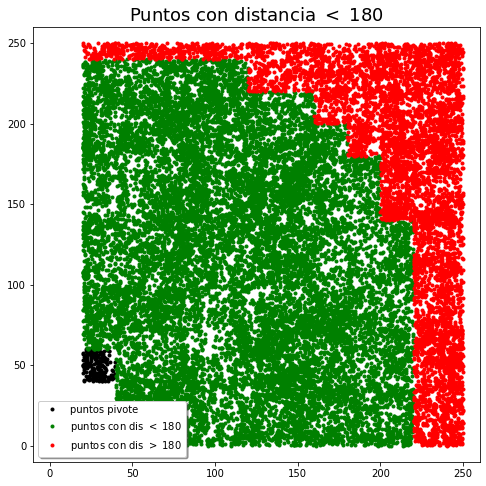

In [51]:
i = 15
dis_max = 180

pm = tam/2
s = puntom[i]-puntom[i+1:] 
dx = puntom[i][0]-puntom[i+1:][:,0]
dy = puntom[i][1]-puntom[i+1:][:,1]
m = np.abs(dy/dx)
dis = np.zeros_like(s[:,0])
dis[m<1] = np.sqrt(s[m<1][:,0]**2+s[m<1][:,1]**2)*(1-(2*pm/np.abs(dx[m<1])))
dis[m>1] = np.sqrt(s[m>1][:,0]**2+s[m>1][:,1]**2)*(1-(2*pm/np.abs(dy[m>1])))
dis[m==1.] = np.sqrt(s[m==1.][:,0]**2+s[m==1.][:,1]**2)-(2*pm*np.sqrt(2))

pp =np.concatenate(np.array(mallas[i+1:],dtype=object)[dis<dis_max])
pp_ =np.concatenate(np.array(mallas[i+1:],dtype=object)[dis>=dis_max])

fig = plt.figure(figsize=(8,8))
plt.plot(mallas[i][:,0],mallas[i][:,1],'k.',label='puntos pivote')
plt.plot(pp[:,0],pp[:,1],'g.',label='puntos con dis $<$ {0}'.format(dis_max))
plt.plot(pp_[:,0],pp_[:,1],'r.',label='puntos con dis $>$ {0}'.format(dis_max))
plt.xlim(-10,260)
plt.ylim(-10,260)
plt.title('Puntos con distancia $<$ {0}'.format(dis_max),fontsize=18)
plt.legend(shadow=True, fontsize='10')

In [40]:
dis

array([  0.        ,  20.        ,  40.        ,  60.        ,
       141.0895106 , 121.21830535, 101.3793755 ,  81.58431222,
        61.84658438,  42.16370214,  22.36067977,   0.        ,
         0.        ,   0.        ,  22.36067977,  42.16370214,
        61.84658438, 144.3086969 , 124.80188382, 105.40925534,
        86.16263691,  67.08203932,  48.07401701,  28.28427125,
        22.36067977,  20.        ,  22.36067977,  28.28427125,
        48.07401701,  67.08203932, 149.52006554, 130.55611039,
       111.80339887,  93.29523032,  75.        ,  56.56854249,
        48.07401701,  42.16370214,  40.        ,  42.16370214,
        48.07401701,  56.56854249,  75.        ])

# PRUEBA

In [55]:
def subdiv(data,tam):
    x = [i for i in range(math.floor(np.min(data[:,0])),math.ceil(np.max(data[:,0]))+tam,tam)]
    y = [i for i in range(math.floor(np.min(data[:,1])),math.ceil(np.max(data[:,1]))+tam,tam)]
    malla = []
    for i in range(len(x)-1):
        for j in range(len(y)-1):
            malla.append(data[(data[:,0]>x[i])&(data[:,0]<x[i+1])&(data[:,1]>y[j])&(data[:,1]<y[j+1])])
    
    puntom = []
    dpm = tam/2
    for i in range(int(np.sqrt(len(malla)))):
        for j in range(int(np.sqrt(len(malla)))):
            puntom.append([dpm+i*tam, dpm+j*tam])
    
    puntom = np.array(puntom)
    
    return malla, puntom, dpm

In [56]:
def Histo_ani_XX(p,bn,point_max):
    
    # Iniciamos los arreglos los histogramas 
    NXX = np.zeros(bn)

    n = 0
    for ii in p:
        n = n+1
        # Histogramas XX
        s = ii-p[n:]
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2), bins=bn, range=(0, point_max))
        NXX = NXX + 2*dis
    return  NXX

In [57]:
def Histo_ani_XY(p,p_r,bn,point_max):
    NDR = np.zeros(bn)
    for ii in p:
        # Histogramas para DR
        s = ii-p_r
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2), bins=bn, range=(0, point_max))
        NDR = NDR + dis
    return NDR

In [58]:
def Histo_mallas(data,tam,bn,point_max):
    
    malla_D, punt_med, dpm = subdiv(data,tam)
    
    NDD = np.zeros(bn)
    for i in range(len(malla_D)):
        NDD = NDD + Histo_ani_XX(malla_D[i],bn,point_max)
        
    n= 0
    for i in range(len(punt_med)-2):
        # Histogramas para DD
        s = punt_med[i]-punt_med[i+1:] 
        dx = punt_med[i][0]-punt_med[i+1:][:,0]
        dy = punt_med[i][1]-punt_med[i+1:][:,1]
        m = np.abs(dy/dx)
        dis = np.zeros_like(s[:,0])
        dis[m<1] = np.sqrt(s[m<1][:,0]**2+s[m<1][:,1]**2)*(1-(2*dpm/np.abs(dx[m<1])))
        dis[m>1] = np.sqrt(s[m>1][:,0]**2+s[m>1][:,1]**2)*(1-(2*dpm/np.abs(dy[m>1])))
        dis[m==1.] = np.sqrt(s[m==1.][:,0]**2+s[m==1.][:,1]**2)-(2*pm*np.sqrt(2))
        NDD = NDD + Histo_ani_XY(malla_D[i],
                                 np.concatenate(np.array(malla_D[i+1:],dtype=object)[dis<point_max]),
                                 bn,point_max)

        #print(i)
    NDD = NDD + Histo_ani_XY(malla_D[len(punt_med)-2],malla_D[len(punt_med)-1],bn,point_max)
    
    return NDD

In [59]:
tam = 10

start = time.perf_counter()

DD = Histo_mallas(data,tam,30,180)

finish = time.perf_counter()
print(f'Finializó en {round(finish-start,2)} segundos')

<ipython-input-58-80fc9c6bfb7d>:15: RuntimeWarning: divide by zero encountered in true_divide
  m = np.abs(dy/dx)


Finializó en 13.92 segundos


In [60]:
DD

array([ 1758332.,  3252525.,  4585167.,  6142771.,  7622376.,  8911782.,
       10109226., 11220955., 12246874., 13203079., 14083858., 14882486.,
       15606187., 16226909., 16686781., 17119161., 17445889., 17743100.,
       17918046., 17937385., 17977343., 17894223., 17682375., 17422186.,
       17143498., 16817216., 16359701., 15887713., 15283997., 14685065.])